# Numerische Methoden für Systeme

### 1.3 Verständnisfragen

1. Was verstehen Sie unter einem konservativen numerischen Verfahren?


 2. Das klassische Runge-Kutta-Verfahren ist ”nahezu” konservativ. Was bedeutet das? Worauf müssen Sie achten,
 wenn Sie das Runge-Kutta-Verfahren für die Lösung von Stabilitätsproblemen einsetzen wollen.

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
p       = 1.184  # kg/m^3
Ca      = 0.45  # constant
Rkugel  = 0.1   # m
m       = 0.05  # kg
g       = 9.81  # m/s^2
ks      = 0.05  # N/m
v0      = 0.0     # m/s
k       = 0.5 * Ca * p * np.pi * Rkugel**2 
print(k)

0.00836920282916321


### 1.4 Aufgaben


### 1. Differentialgleichung und Anfangswertproblem

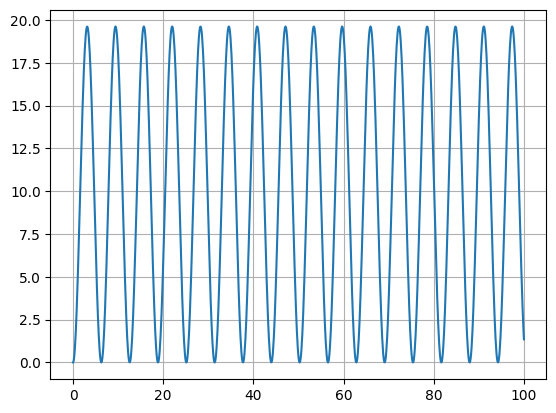

In [43]:
def model1(x):
    x0 = x[0] # x
    x1 = x[1] # dx
    return np.array([x1, g - (ks*x0/m)-(k/m)*(x1+v0)**2 * mysign(x1+v0)])
    
def model1_df(x,y):
    return (x**2)/(y**2)
    
def model1_analytisch(x):
    x = (m*g/ks) * (1-np.cos(np.sqrt(ks/m)*x))
    dx = np.sqrt(m/ks)*g * np.sin(np.sqrt(ks/m)*x)
    return x, dx


# Signum Funktion
def mysign(x): # numpy sign liefert 0 für 0
    if x >= 0:
        return 1
    else:
        return -1
    

tdata_model = np.linspace(0, 100, 1000)
plt.plot(tdata_model, model1_analytisch(tdata_model)[0], label='Analytisch')
plt.grid()
plt.show()

### 2. gDgln lösen mit RK4 Verfahren

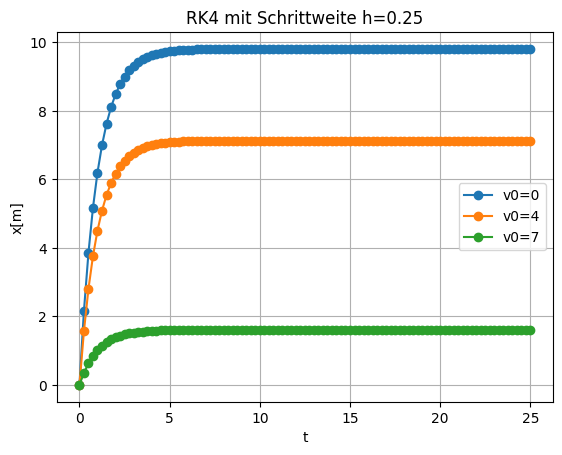

In [84]:
# Verfahren Runge-Kutta-Verfahren (RK4)
def runga_kutta_RK4_Systeme(x0, y0, X, N, f):
    # f: Funktion mit n Gleichungen
    # x0: Anfangswerte
    # X: Endwert
    # N: Anzahl der Schritte
    
    #h = (X-x0[0])/N
    h = 0.25
    N = N+1
    #print("EXP: Schrittweite: ", h)

    # Vektor mit x-daten und dx-daten
    x = np.array([np.zeros((N)), np.zeros((N))])

    # Vektor mit y-daten und dy-daten
    y = np.array([np.zeros((N)), np.zeros((N))])
    z = np.zeros((N))
    
    x[0][0] = x0[0]
    x[1][0] = x0[1]

    for i in range(1, N):
        #x[0][i] += h
        #x[1][i] += h
        z[i] = z[i-1] + h

        k1 = f([x[0][i-1],               x[1][i-1]])
        k2 = f([x[0][i-1] + 0.5*h*k1[1], x[1][i-1] + 0.5*h*k1[0]])
        k3 = f([x[0][i-1] + 0.5*h*k2[1], x[1][i-1] + 0.5*h*k2[0]])
        k4 = f([x[0][i-1] + h*k3[1],     x[1][i-1] + h*k3[0]])
        x[0][i] = x[0][i-1] + h*((1/6)*k1[1] + (1/3)*k2[1] + (1/3)*k3[1] + (1/6)*k4[1]) #x
        x[1][i] = x[1][i-1] + h*((1/6)*k1[0] + (1/3)*k2[0] + (1/3)*k3[0] + (1/6)*k4[0]) #dx

    return x, y, z


def model1(x):
    x0 = x[0] # x
    x1 = x[1] # dx
    return np.array([x1,  -(k/m)*(x1+v0)*np.abs(x1+v0)- ((ks*x0)/m) + g])


#tdata_model = np.linspace(0, 100, 1000)
x0 = (0, 0)
y0 = (0, 0)
Xend = 100
v0 = 0.0
v0_x, v0_y, t = runga_kutta_RK4_Systeme(x0, y0, Xend, 100, model1)
v0 = 4.0
v4_x, v4_y, t = runga_kutta_RK4_Systeme(x0, y0, Xend, 100, model1)
v0 = 7.0
v7_x, v7_y, t = runga_kutta_RK4_Systeme(x0, y0, Xend, 100, model1)

#print("EXP: RK4: ", RK_RK4_x[0])
#print("EXP: RK4: ", RK_RK4_y[0])

# =================== Plot erstellen ===================
plt.figure(2)
plt.plot(t,v0_x[0],  'o-', label='v0=0')
plt.plot(t,v4_x[0],  'o-', label='v0=4')
plt.plot(t,v7_x[0],  'o-', label='v0=7')
plt.ylabel('x[m]')
plt.xlabel('t')
plt.title('RK4 mit Schrittweite h=0.25')
plt.legend()
plt.grid(True)
plt.show()

### 3. Optional

### 4. gDgln lösen mit Impliziten Mittelpunktregel

In [85]:
# Verfahren Runge-Kutta-Verfahren (RK4)
def runga_kutta_RK4_Systeme(x0, y0, X, N, f):
    # f: Funktion mit n Gleichungen
    # x0: Anfangswerte
    # X: Endwert
    # N: Anzahl der Schritte
    
    #h = (X-x0[0])/N
    h = 0.25
    N = N+1
    #print("EXP: Schrittweite: ", h)

    # Vektor mit x-daten und dx-daten
    x = np.array([np.zeros((N)), np.zeros((N))])

    # Vektor mit y-daten und dy-daten
    y = np.array([np.zeros((N)), np.zeros((N))])
    z = np.zeros((N))
    
    x[0][0] = x0[0]
    x[1][0] = x0[1]

    for i in range(1, N):
        #x[0][i] += h
        #x[1][i] += h
        z[i] = z[i-1] + h

        k1 = f([x[0][i-1],               x[1][i-1]])
        k2 = f([x[0][i-1] + 0.5*h*k1[1], x[1][i-1] + 0.5*h*k1[0]])
        k3 = f([x[0][i-1] + 0.5*h*k2[1], x[1][i-1] + 0.5*h*k2[0]])
        k4 = f([x[0][i-1] + h*k3[1],     x[1][i-1] + h*k3[0]])
        x[0][i] = x[0][i-1] + h*((1/6)*k1[1] + (1/3)*k2[1] + (1/3)*k3[1] + (1/6)*k4[1]) #x
        x[1][i] = x[1][i-1] + h*((1/6)*k1[0] + (1/3)*k2[0] + (1/3)*k3[0] + (1/6)*k4[0]) #dx

    return x, y, z

### 5. Vergleichen der Numerischen Lösungen